In [24]:
from os.path import join
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import regions, maskers, masking, image, surface


In [25]:
main_dir = '/Users/h/Documents/projects_local/Tian2020MSA/3T/Cortex-Subcortex'
subcortex = join(main_dir,'MNIvolumetric', 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_3T_MNI152NLin2009cAsym_2mm.nii.gz')
subcortex_label = join(main_dir,  'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_label.txt')


(97, 115, 97)

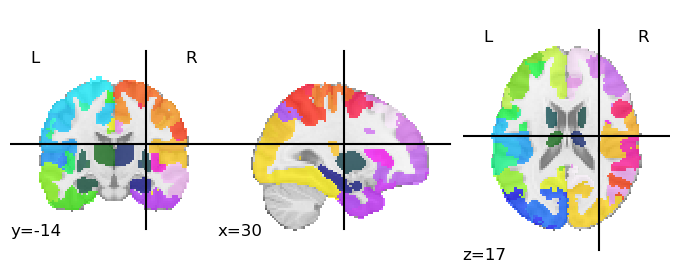

In [26]:
plotting.plot_roi(subcortex)
subcortex_atlas = image.load_img(subcortex)
subcortex_atlas.shape

In [27]:
labels = pd.read_csv(subcortex_label, sep='\t', header=None)

In [5]:
from itertools import chain

nested_list = labels[0::2].values.tolist()
list(chain(*nested_list))

['HIP-rh',
 'AMY-rh',
 'pTHA-rh',
 'aTHA-rh',
 'NAc-rh',
 'GP-rh',
 'PUT-rh',
 'CAU-rh',
 'HIP-lh',
 'AMY-lh',
 'pTHA-lh',
 'aTHA-lh',
 'NAc-lh',
 'GP-lh',
 'PUT-lh',
 'CAU-lh',
 '7Networks_LH_Vis_1',
 '7Networks_LH_Vis_2',
 '7Networks_LH_Vis_3',
 '7Networks_LH_Vis_4',
 '7Networks_LH_Vis_5',
 '7Networks_LH_Vis_6',
 '7Networks_LH_Vis_7',
 '7Networks_LH_Vis_8',
 '7Networks_LH_Vis_9',
 '7Networks_LH_Vis_10',
 '7Networks_LH_Vis_11',
 '7Networks_LH_Vis_12',
 '7Networks_LH_Vis_13',
 '7Networks_LH_Vis_14',
 '7Networks_LH_SomMot_1',
 '7Networks_LH_SomMot_2',
 '7Networks_LH_SomMot_3',
 '7Networks_LH_SomMot_4',
 '7Networks_LH_SomMot_5',
 '7Networks_LH_SomMot_6',
 '7Networks_LH_SomMot_7',
 '7Networks_LH_SomMot_8',
 '7Networks_LH_SomMot_9',
 '7Networks_LH_SomMot_10',
 '7Networks_LH_SomMot_11',
 '7Networks_LH_SomMot_12',
 '7Networks_LH_SomMot_13',
 '7Networks_LH_SomMot_14',
 '7Networks_LH_SomMot_15',
 '7Networks_LH_SomMot_16',
 '7Networks_LH_DorsAttn_Post_1',
 '7Networks_LH_DorsAttn_Post_2',
 '7Net

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


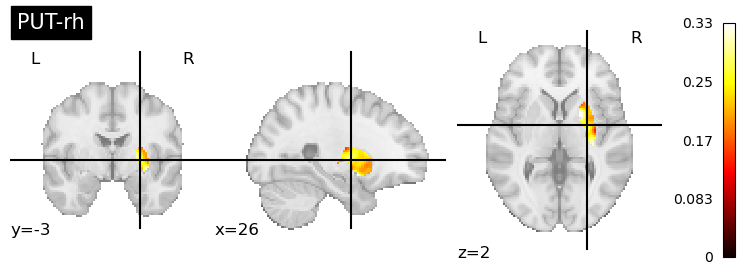

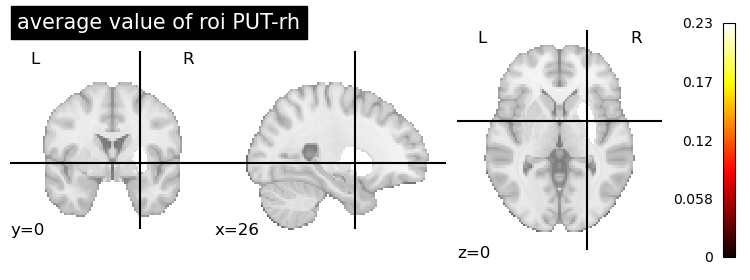

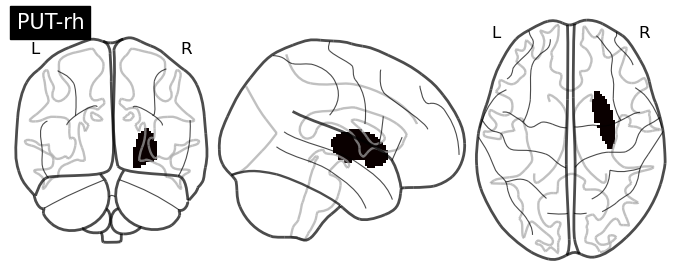

In [29]:
high_cue = '/Users/h/Documents/projects_local/sandbox/cue/sub-avg_ses-avg_run-avg_task-pain_event-stimulus_cuetype-high.nii.gz'
ref_img = image.load_img(high_cue)
canlab_dir = '/Users/h/Documents/MATLAB/CanlabCore'
mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))
# get region index
atlas_index = 
atlas_label = labels.iloc[atlas_index*2-2,0]
region_mask = (subcortex_atlas.get_fdata() == atlas_index)
masked_roi = image.new_img_like(subcortex_atlas, region_mask)
masker = maskers.NiftiMasker(mask_img=masked_roi)
masked_data = masker.fit_transform(ref_img)
masked_img = masker.inverse_transform(masked_data)

plotting.plot_stat_map(masked_img, title=f"{atlas_label}")

masked_avg = masker.inverse_transform(np.full(masked_data.shape, np.mean(masked_data))) # fill ROI with average values
plotting.plot_stat_map(masked_avg, title=f"average value of roi {atlas_label}")

plotting.plot_glass_brain(masked_roi, title=f"{atlas_label}")

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


HIP-rh 1
roi size: 203
values in functional data: 203
AMY-rh 2
roi size: 111
values in functional data: 111
pTHA-rh 3
roi size: 121
values in functional data: 121
aTHA-rh 4
roi size: 274
values in functional data: 274
NAc-rh 5
roi size: 80
values in functional data: 80
GP-rh 6
roi size: 58
values in functional data: 58
PUT-rh 7
roi size: 281
values in functional data: 281
CAU-rh 8
roi size: 116
values in functional data: 116
HIP-lh 9
roi size: 197
values in functional data: 197
AMY-lh 10
roi size: 113
values in functional data: 113
pTHA-lh 11
roi size: 143
values in functional data: 143
aTHA-lh 12
roi size: 290
values in functional data: 290
NAc-lh 13
roi size: 85
values in functional data: 85
GP-lh 14
roi size: 58
values in functional data: 58
PUT-lh 15
roi size: 276
values in functional data: 276
CAU-lh 16
roi size: 135
values in functional data: 135


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


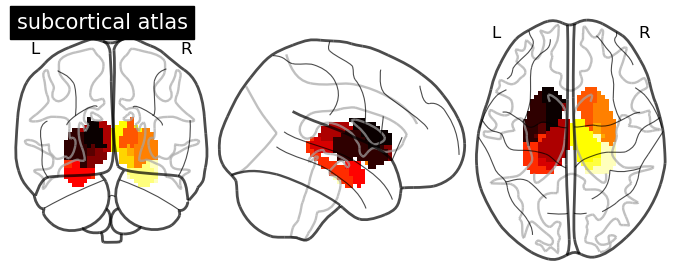

In [20]:
from nilearn.datasets import (load_mni152_template)
template = load_mni152_template(resolution=3)
# mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))

subcortex = join(main_dir,'MNIvolumetric', 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_3T_MNI152NLin2009cAsym_2mm.nii.gz')
subcortex_atlas = image.load_img(subcortex)
subcortex_img = image.resample_to_img(subcortex_atlas, template, interpolation='nearest') #, target_affine=ref_img.affine, target_shape=ref_img.shape)
nifti_masker = maskers.NiftiMasker(mask_img=masking.compute_epi_mask(template))# print(f"* mask shape after resampling to MNI 3mm: {nifti_masker.mask_img_.shape}")

roi_array = nifti_masker.fit_transform(subcortex_atlas)
roi_img = nifti_masker.inverse_transform(roi_array)
masked_func_array = nifti_masker.fit_transform(high_cue)
masked_func_img = nifti_masker.inverse_transform(masked_func_array)

masked_img = masker.inverse_transform(masked_data)
roi_data = np.full(masked_func_img.get_fdata().squeeze().shape, np.nan)
for atlas_index in np.arange(1,17): 
    atlas_label = labels.iloc[atlas_index*2-2,0]
    # print(atlas_label, atlas_index)
    region_mask = (subcortex_img.get_fdata() == atlas_index)
    print(f"roi size: {np.sum(region_mask)}")

    func_roi = masked_func_img.get_fdata()[region_mask]
    print(f"values in functional data: {len(roi_img.get_fdata()[region_mask])}")
    roi_data[region_mask] = atlas_index
# masked_avg = image.new_img_like(subcortex_img, roi_data)
# plotting.plot_stat_map(masked_img, title=f"{atlas_label}")
sub_atlas = image.new_img_like(subcortex_img, roi_data)

plotting.plot_glass_brain(sub_atlas, title=f"subcortical atlas")
# plotting.plot_glass_brain(subcortex_atlas, title=f"{atlas_label}")

# iterate through ROIS
* here, i try to iterate through the ROIS.
* I extract the values for each ROI and average them within each parcel. 
* Then, I fill the parcel with each mean value
* The ultimate plot would be to have average parcelwise values

In [69]:
from nilearn.datasets import (load_mni152_template)
template = load_mni152_template(resolution=3)
# mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))

subcortex = join(main_dir,'MNIvolumetric', 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_3T_MNI152NLin2009cAsym_2mm.nii.gz')
subcortex_atlas = image.load_img(subcortex)
subcortex_img = image.resample_to_img(subcortex_atlas, template, interpolation='nearest') #, target_affine=ref_img.affine, target_shape=ref_img.shape)
nifti_masker = maskers.NiftiMasker(mask_img=masking.compute_epi_mask(template))# print(f"* mask shape after resampling to MNI 3mm: {nifti_masker.mask_img_.shape}")


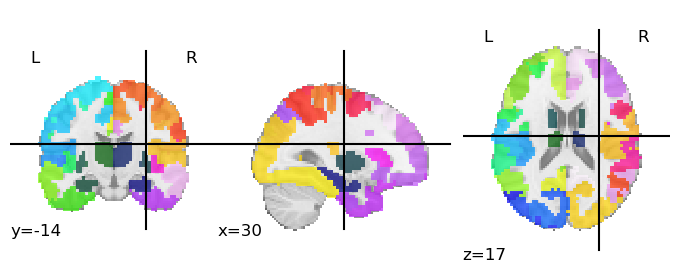

In [66]:
plotting.plot_roi(subcortex_img)

In [127]:
roi_array = nifti_masker.fit_transform(subcortex_atlas)
roi_img = nifti_masker.inverse_transform(roi_array)
masked_func_array = nifti_masker.fit_transform(high_cue)
masked_func_img = nifti_masker.inverse_transform(masked_func_array)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


HIP-rh 1
roi size: 203
values in functional data: 203
AMY-rh 2
roi size: 111
values in functional data: 111
pTHA-rh 3
roi size: 121
values in functional data: 121
aTHA-rh 4
roi size: 274
values in functional data: 274
NAc-rh 5
roi size: 80
values in functional data: 80
GP-rh 6
roi size: 58
values in functional data: 58
PUT-rh 7
roi size: 281
values in functional data: 281
CAU-rh 8
roi size: 116
values in functional data: 116
HIP-lh 9
roi size: 197
values in functional data: 197
AMY-lh 10
roi size: 113
values in functional data: 113
pTHA-lh 11
roi size: 143
values in functional data: 143
aTHA-lh 12
roi size: 290
values in functional data: 290
NAc-lh 13
roi size: 85
values in functional data: 85
GP-lh 14
roi size: 58
values in functional data: 58
PUT-lh 15
roi size: 276
values in functional data: 276
CAU-lh 16
roi size: 135
values in functional data: 135


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


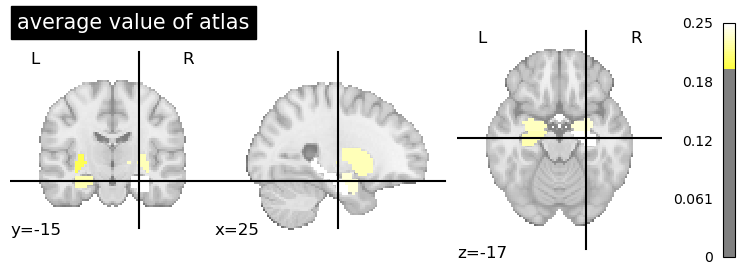

In [146]:
roi_data = np.full(masked_func_img.get_fdata().squeeze().shape, np.nan)
for atlas_index in np.arange(1,17): 
    atlas_label = labels.iloc[atlas_index*2-2,0]
    print(atlas_label, atlas_index)
    region_mask = (subcortex_img.get_fdata() == atlas_index)
    print(f"roi size: {np.sum(region_mask)}")

    func_roi = masked_func_img.get_fdata()[region_mask]
    print(f"values in functional data: {len(roi_img.get_fdata()[region_mask])}")
    roi_data[region_mask] = np.mean(func_roi)
masked_avg = image.new_img_like(subcortex_img, roi_data)
# masked_atlas = image.new_img_like(subcortex_img, nifti_masker.inverse_transform(roi_data))
plotting.plot_stat_map(masked_avg, title=f"average value of atlas", threshold=.2)
